# Participants Data Overview

This holds the anaylsis of the onboarding data from the participants.

In [1]:
from all_imports import *

import _modules

from _modules.plotColors import *


 ### test init### 


In [2]:
filepath: str  = r'C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\data\raw\Onboarding\NUS IRB-2022-212 - Participant Onboarding Form_March 31, 2024_12.34.csv'

PARTICIPANTS_data_df = pd.read_csv(filepath, header=1)
PARTICIPANTS_data_df = PARTICIPANTS_data_df.drop(PARTICIPANTS_data_df.index[0])


columns_df = pd.DataFrame(PARTICIPANTS_data_df.columns, columns=['Column Names'])
columns_df.to_csv(r'C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\data\raw\Onboarding\Participant Onboarding column_names.csv', index=False)

#Select Participants
lst_participants1 = ['esse02', 'esse07', 'esse08', 'esse09', 'esse10', 'esse11', 'esse13','esse14'] 
lst_participants2 = ['esse01', 'esse03', 'esse04', 'esse05', 'esse06'] #'esse00'
lst_participants = lst_participants1 + lst_participants2
PARTICIPANTS_data_df = PARTICIPANTS_data_df[PARTICIPANTS_data_df['Experiment tag (for example esse01, provided by the researcher)'].isin(lst_participants)]

PARTICIPANTS_data_df = PARTICIPANTS_data_df.rename(columns={'Experiment tag (for example esse01, provided by the researcher)': 'id_participant',
                                                            'Gender': 'gender',
                                                            'Height (cm)': 'height',
                                                            'Weight (kg)': 'weight',
                                                            'Year of birth (for example 1995)': 'YearofBirth'})

PARTICIPANTS_data_df = PARTICIPANTS_data_df.rename(columns={'How many years have you been in Singapore (Example: 2.5 = 2 years and 6 months)?': 'YearsInSingapore?',
                                                            'Can you say that you are used to the weather in Singapore?': 'UsedToSingpore?',
                                                            'Can you say that you are satisfied with the weather in Singapore (outdoor weather conditions)?': 'StatisfiedOutdoors?',
                                                            'Do you suffer from sweating in Singapore?': 'Sweating?',
                                                            'Do you enjoy being outdoor in Singapore?': 'EnjoyOutoors?',
                                                            'What is your estimation of your time you spent outdoor (in hours per day) during the weekdays?': 'TimeSpentOutdoorsWeekday?',
                                                            'What is your estimation of your time spent outdoor (in hours per day) during the weekend?': 'TimeSpendOutdoorsWeekend?'})

PARTICIPANTS_data_df = PARTICIPANTS_data_df.rename(columns={'If female: When did you had your last period?': 'LastPeriod?',
                                                            'If female: How long does your period last on average?': 'DurationPeriod?',
                                                            'If female: Please rate the intensity of your menstrual period on a scale from 1 to 10, where 1 is very light, and 10 is extremely intense.': 'IntensityPeriod?'})


#Dtypes
PARTICIPANTS_data_df['height'] = PARTICIPANTS_data_df['height'].astype(float)
PARTICIPANTS_data_df['weight'] = PARTICIPANTS_data_df['weight'].astype(float)
PARTICIPANTS_data_df['YearofBirth'] = PARTICIPANTS_data_df['YearofBirth'].astype(int)
PARTICIPANTS_data_df['YearsInSingapore?'] = PARTICIPANTS_data_df['YearsInSingapore?'].astype(float)
PARTICIPANTS_data_df['UsedToSingpore?'] = PARTICIPANTS_data_df['UsedToSingpore?'].map({'Yes': True, 'No': False})
satisfaction_mapping = {
    "Very satisfied": 5,
    "Moderately satisfied": 4,
    "Slightly satisfied": 3,
    "Neither satisfied nor dissatisfied": 2,
    "Slightly dissatisfied": 1,
    "Moderately dissatisfied": 0
}
PARTICIPANTS_data_df['StatisfiedOutdoors?'] = PARTICIPANTS_data_df['StatisfiedOutdoors?'].map(satisfaction_mapping)
PARTICIPANTS_data_df['Sweating?'] = PARTICIPANTS_data_df['Sweating?'].astype(int)
PARTICIPANTS_data_df['EnjoyOutoors?'] = PARTICIPANTS_data_df['EnjoyOutoors?'].map({'Yes': True, 'No': False})
PARTICIPANTS_data_df['TimeSpentOutdoorsWeekday?'] = PARTICIPANTS_data_df['TimeSpentOutdoorsWeekday?'].astype(int)
PARTICIPANTS_data_df['TimeSpendOutdoorsWeekend?'] = PARTICIPANTS_data_df['TimeSpendOutdoorsWeekend?'].astype(int)
PARTICIPANTS_data_df['LastPeriod?'] = pd.to_datetime(PARTICIPANTS_data_df['LastPeriod?'], format='%d.%m.%Y', errors='coerce')
PARTICIPANTS_data_df['DurationPeriod?'] = pd.to_numeric(PARTICIPANTS_data_df['DurationPeriod?'], errors='coerce')
PARTICIPANTS_data_df['IntensityPeriod?'] = pd.to_numeric(PARTICIPANTS_data_df['IntensityPeriod?'], errors='coerce')

PARTICIPANTS_data_df['Start'] = pd.to_datetime(PARTICIPANTS_data_df['Start'], format='%m/%d/%Y', errors='coerce')
PARTICIPANTS_data_df['End'] = pd.to_datetime(PARTICIPANTS_data_df['End'], format='%m/%d/%Y', errors='coerce')

#calculate BMI
PARTICIPANTS_data_df['BMI'] = PARTICIPANTS_data_df['weight'] / (PARTICIPANTS_data_df['height'] / 100) ** 2
PARTICIPANTS_data_df['Age'] = 2024 - PARTICIPANTS_data_df['YearofBirth']

display(PARTICIPANTS_data_df.head(10))

file_name: str = "_02-ParticipantsData"
filepath_dir: str =os.path.join(r"C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\report", file_name)


,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,On which of those days do you train outdoors? - Tuesday,On which of those days do you train outdoors? - Wednesday,On which of those days do you train outdoors? - Thursday,On which of those days do you train outdoors? - Friday,On which of those days do you train outdoors? - Saturday,On which of those days do you train outdoors? - Sunday,Start,End,BMI,Age
1,1/18/2024 08:49,1/18/2024 08:56,IP Address,122.11.212.93,100,450,True,1/18/2024 08:56,R_4Yxk64aaetAwTRH,NaN,...,Outdoor,Outdoor,Outdoor,Outdoor,Outdoor,Outdoor,2024-01-18,2024-02-07,22.189349,25
2,1/18/2024 10:11,1/18/2024 10:20,IP Address,137.132.26.80,100,548,True,1/18/2024 10:20,R_47IMdcPg6QF6GyZ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-18,2024-02-06,23.510204,25
3,1/18/2024 11:07,1/18/2024 11:16,IP Address,137.132.26.162,100,547,True,1/18/2024 11:16,R_47RIyCasoDuGpa1,NaN,...,Indoor,Indoor,Indoor,Indoor,Indoor,Indoor,2024-01-18,2024-02-07,22.058051,22
4,1/18/2024 14:39,1/18/2024 14:46,IP Address,119.234.5.59,100,403,True,1/18/2024 14:46,R_4lyLocCPN3VYEyy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-18,2024-02-02,19.777699,22
5,1/19/2024 13:10,1/19/2024 13:18,IP Address,202.51.247.23,100,476,True,1/19/2024 13:18,R_42eWFcoZFdadPYV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-19,2024-02-01,19.650562,24
7,2/20/2024 10:00,2/20/2024 10:06,IP Address,122.11.212.167,100,392,True,2/20/2024 10:06,R_42c2guG252p75dW,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-20,2024-03-13,27.250887,25
8,2/20/2024 13:13,2/20/2024 13:22,IP Address,137.132.26.105,100,566,True,2/20/2024 13:22,R_4kRcOAaHXJMhVUe,NaN,...,Indoor,Indoor,Indoor,Indoor,Outdoor,Outdoor,2024-02-20,2024-03-12,24.897060,24
9,2/20/2024 14:11,2/20/2024 14:21,IP Address,111.65.36.45,100,584,True,2/20/2024 14:21,R_4OIUoiYv01X7djS,NaN,...,Indoor,Indoor,Indoor,Indoor,Outdoor,Indoor,2024-02-20,2024-03-12,22.230987,30
10,2/20/2024 15:09,2/20/2024 15:14,IP Address,137.132.26.170,100,301,True,2/20/2024 15:14,R_4T0w06ChvfJMVAR,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-20,2024-03-15,23.422091,21
11,2/20/2024 16:02,2/20/2024 16:08,IP Address,104.28.122.110,100,380,True,2/20/2024 16:08,R_4rOrEWLn3LNWu5Q,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-02-20,2024-03-15,19.735976,24


C:\Users\gottk\AppData\Local\Temp\ipykernel_18964\3203942970.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=PARTICIPANTS_general_df, x="gender", y="weight", ax=ax2, palette=gender_colors)
C:\Users\gottk\AppData\Local\Temp\ipykernel_18964\3203942970.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=PARTICIPANTS_general_df, x="gender", y="Age", ax=ax3, palette=gender_colors)
C:\Users\gottk\AppData\Local\Temp\ipykernel_18964\3203942970.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Plot saved to C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\report\_02-ParticipantsData\Scatter_ParticipantsAgeBMIWeight.png


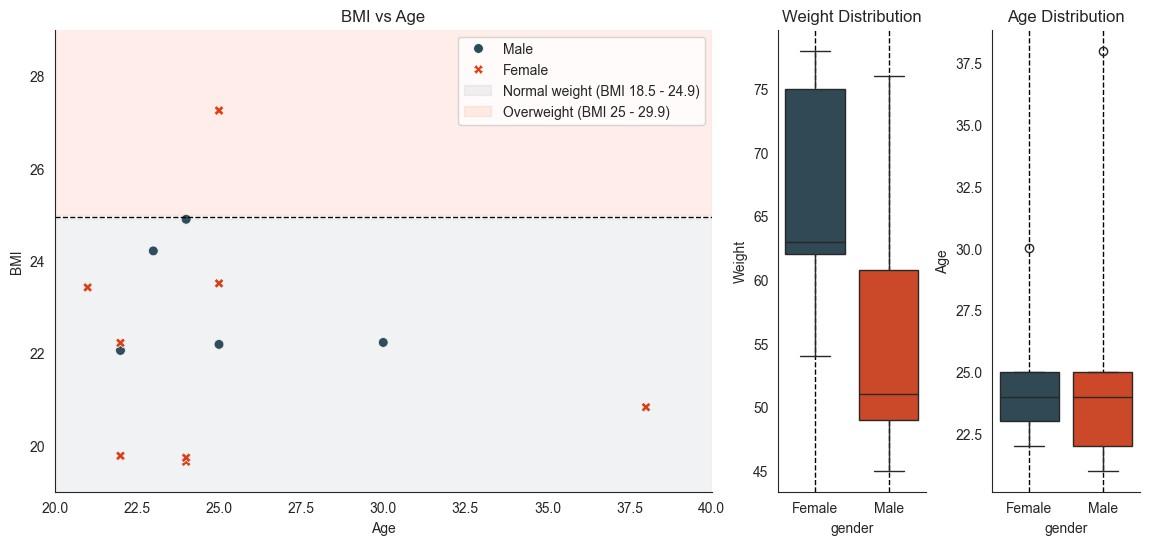

In [125]:
columns = ['id_participant', 'BMI', 'Age', 'gender', 'height', 'weight']
PARTICIPANTS_general_df = PARTICIPANTS_data_df[columns]

# Set the aesthetic style of the plots
# Set the aesthetic style of the plots
sns.set_style('white')
gender_colors = {'Female': color_vulcanfire, 'Male': color_deepseablue}
# Create a figure with GridSpec
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 4, width_ratios=[2, 2, 1, 1], wspace=0.3)

# Scatter plot of BMI vs Age colored by Gender
ax1 = fig.add_subplot(gs[0, 0:2])
sns.scatterplot(data=PARTICIPANTS_general_df, x="Age", y="BMI", hue="gender", style="gender", s=50, ax=ax1, palette=gender_colors)

# Add background color for BMI categories
# ax1.axhspan(0, 18.5, color='lightblue', alpha=0.3, label='Underweight (BMI < 18.5)')
ax1.axhspan(18.5, 24.9, color=cGrey, alpha=0.09, label='Normal weight (BMI 18.5 - 24.9)')
ax1.axhspan(25, 29.9, color=cOrange, alpha=0.09, label='Overweight (BMI 25 - 29.9)')
# ax1.axhspan(30, 40, color='lightcoral', alpha=0.3, label='Obesity (BMI >= 30)')

ax1.axhline(24.95, color='black', linestyle='--', linewidth=1)
#ax1.axhline(25, color='black', linestyle='--', linewidth=1)

ax1.set_ylim(19, 29)
ax1.set_xlim(20, 40) 

ax1.set_title("BMI vs Age")
ax1.set_xlabel("Age")
ax1.set_ylabel("BMI")

# Adjust legend to show BMI categories as well
handles, labels = ax1.get_legend_handles_labels()
labels_dict = dict(zip(labels, handles))
bmi_labels = ['Normal weight (BMI 18.5 - 24.9)', 'Overweight (BMI 25 - 29.9)'] #'Underweight (BMI < 18.5)', , 'Obesity (BMI >= 30)'
# bmi_handles = [plt.Line2D([0], [0], color='black', lw=4),
#                 plt.Line2D([0], [0], color='black', lw=4)]
#                plt.Line2D([0], [0], color='yellow', lw=4),
#                plt.Line2D([0], [0], color='lightcoral', lw=4)]
# for bmi_label, bmi_handle in zip(bmi_labels, bmi_handles):
#     labels_dict[bmi_label] = bmi_handle

ax1.legend(labels_dict.values(), labels_dict.keys(), loc='upper right')
sns.despine(ax=ax1)


# Boxplot of weight distribution
ax2 = fig.add_subplot(gs[0, 2])
# Draw vertical lines first
for tick in [0, 1]:
    ax2.axvline(tick, color='black', linestyle='--', linewidth=1)

# Overlay the box plot
sns.boxplot(data=PARTICIPANTS_general_df, x="gender", y="weight", ax=ax2, palette=gender_colors)
ax2.set_title("Weight Distribution")
ax2.set_ylabel("Weight")

# Ensure x-axis covers both categories and set tick labels
ax2.set_xticks([0, 1])  # Set positions of ticks
ax2.set_xticklabels(['Female', 'Male'])  # Set tick labels

sns.despine(ax=ax2)

# Boxplot of age distribution
ax3 = fig.add_subplot(gs[0, 3])
# Draw vertical lines first
for tick in [0, 1]:
    ax3.axvline(tick, color='black', linestyle='--', linewidth=1)

# Overlay the box plot
sns.boxplot(data=PARTICIPANTS_general_df, x="gender", y="Age", ax=ax3, palette=gender_colors)
ax3.set_title("Age Distribution")
ax3.set_ylabel("Age")

# Ensure x-axis covers both categories and set tick labels
ax3.set_xticks([0, 1])  # Set positions of ticks
ax3.set_xticklabels(['Female', 'Male'])  # Set tick labels

sns.despine(ax=ax3)

plt.tight_layout()

filepath = os.path.join(filepath_dir, "Scatter_ParticipantsAgeBMIWeight.png")
if filepath != "":
    directory = os.path.dirname(filepath)
        
    # Create directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {filepath}")


plt.savefig(filepath)

plt.show()

### Temperature Experience

In [51]:
### Temperature Experience in Singapore
df = PARTICIPANTS_data_df.copy()

# How many years have you been in Singapore (Example: 2.5 = 2 years and 6 months)?
# Can you say that you are used to the weather in Singapore? Yes or No
# Can you say that you are satisfied with the weather in Singapore (outdoor weather conditions)?
# Do you suffer from sweating in Singapore?
# Do you enjoy being outdoor in Singapore?
# "What is your estimation of your time you spent outdoor (in hours per day) during the weekdays? (Example: 8 = 8 hours/day)"
# What is your estimation of your time spent outdoor (in hours per day) during the weekend? (Example: 8 = 8 hours/day)


df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})


### Correlations


In [103]:
columns = {
    'gender': 'GEN',
    'Age': 'AGE',
    'weight': 'WEI',
    'BMI': 'BMI',
    'YearsInSingapore?': 'YIS',
    'UsedToSingpore?': 'UTS',
    'StatisfiedOutdoors?': 'SOU',
    'Sweating?': 'SWE',
    'EnjoyOutoors?': 'EOU',
    'TimeSpentOutdoorsWeekday?': 'TWD',
    'TimeSpendOutdoorsWeekend?': 'TWE'
}

# Add explanations for the variables
explanations_a = [
    r"$\bf{GEN}$: Gender?",
    r"$\bf{AGE}$: Age",
    r"$\bf{WEI}$: Weight",
    r"$\bf{BMI}$: Body Mass Index",
]

explanations_b = [
    r"$\bf{YIS}$: Years in Singapore",
    r"$\bf{UTS}$: Used to Singapore?",
    r"$\bf{SOU}$: Satisfied with Outdoors?",
    r"$\bf{SWE}$: Sweating?",
    
]

explanations_c = [
    r"$\bf{EOU}$: Enjoy Outdoors?",
    r"$\bf{TWD}$: Time Spent Outdoors Weekday",
    r"$\bf{TWE}$: Time Spent Outdoors Weekend",
    "",
]


Plot saved to C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\report\_02-ParticipantsData\Corr_CorrelationHeatmapParticipants.png


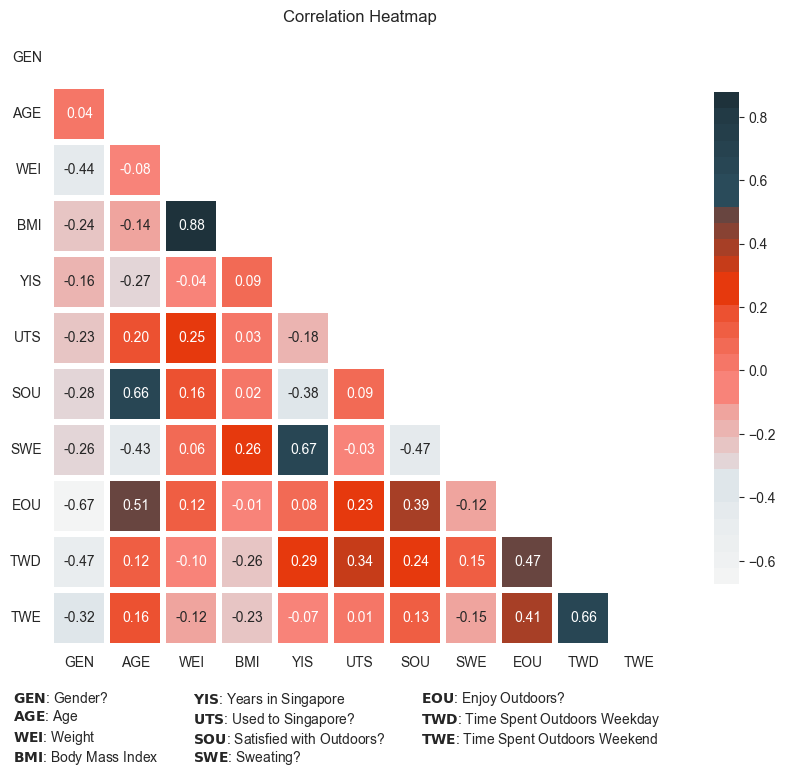

In [104]:

# Rename the columns in the DataFrame
df_renamed = df.rename(columns=columns)

# Compute the correlation matrix
corr = df_renamed[list(columns.values())].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=gradient_lightvulcanelderberry, fmt='.2f', cbar_kws={"shrink": .8}, linecolor='white', linewidths=3, square=True)
plt.yticks(rotation=0) 

# Add title
plt.title('Correlation Heatmap')


# Add the legend below the graph
plt.figtext(0.2, -0.035, "\n".join(explanations_a), ha="left", fontsize=10)
plt.figtext(0.35, -0.035, "\n".join(explanations_b), ha="left", fontsize=10)
plt.figtext(0.54, -0.035, "\n".join(explanations_c), ha="left", fontsize=10)
# Save the plot to the specified filepath
filepath = os.path.join(filepath_dir, "Corr_CorrelationHeatmapParticipants.png")
if filepath:
    directory = os.path.dirname(filepath)
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {filepath}")

# Show the plot
plt.show()

16
Plot saved to C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\report\_02-ParticipantsData\Scatter_Trendlines_Automatic_HighlyCorrelatedVariables_WithLegend.png


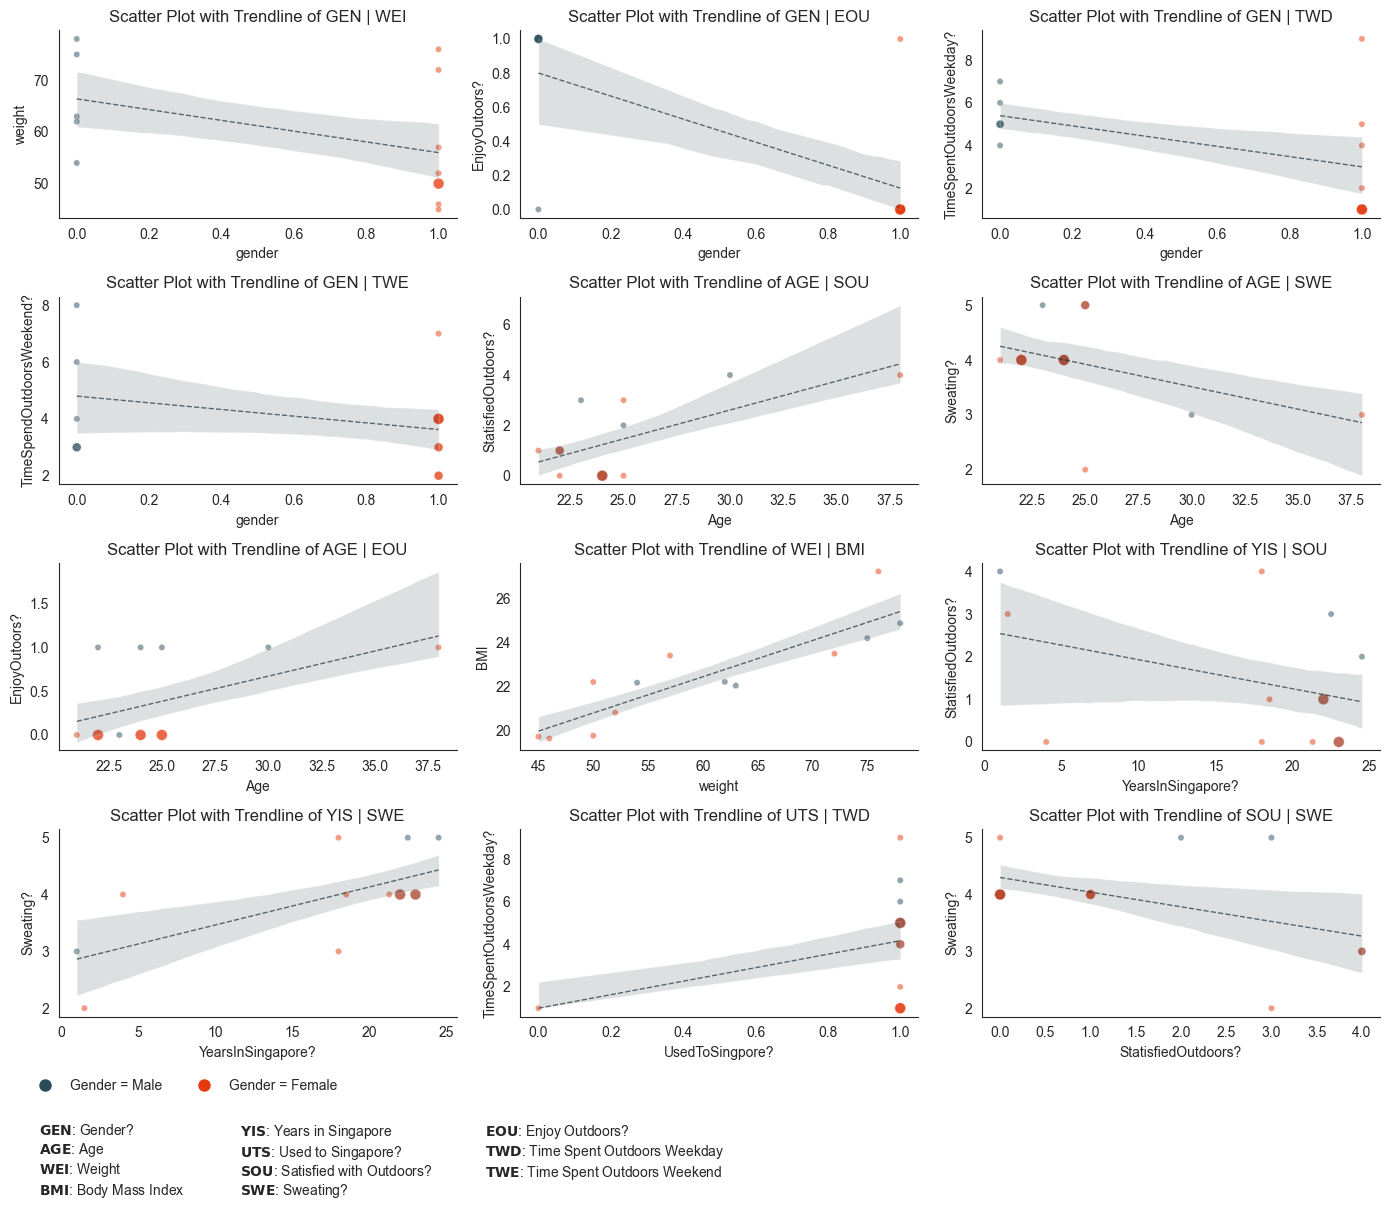

In [124]:
from sklearn.neighbors import KernelDensity

def calculate_density(x, y, bandwidth=0.1):
    xy = np.vstack([x, y]).T
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(xy)
    log_density = kde.score_samples(xy)
    density = np.exp(log_density)
    return density


# Assuming columns and df are already defined
columns_inv = {v: k for k, v in columns.items()}

# Rename the columns in the DataFrame
df_renamed = df.rename(columns=columns)

# Select only the relevant columns
df_filtered = df_renamed[list(columns.values())]

# Calculate the correlation matrix
corr = df_filtered.corr().abs()

# Automatically identify highly correlated pairs (threshold can be adjusted)
threshold = 0.3
high_corr_pairs = np.where(corr > threshold)
high_corr_pairs = [(corr.index[x], corr.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]

print(len(high_corr_pairs))
# List of pairs to analyze (using those identified automatically)
pairs = high_corr_pairs[:12]  # Limiting to the first 12 pairs for 4x3 grid

# Set up the matplotlib figure
fig, axes = plt.subplots(4, 3, figsize=(14, 12))

# Plot each pair with a trendline and custom points by gender
for i, (var1, var2) in enumerate(pairs):
    ax = axes[i // 3, i % 3]
    
    # Calculate densities
    densities = calculate_density(df_renamed[var1], df_renamed[var2])
    
    # Scatter plot with different colors for gender and adjusted point sizes
    sns.scatterplot(
        data=df_renamed, x=var1, y=var2, hue='GEN', 
        palette={0: color_deepseablue, 1: color_vulcanfire}, 
        marker='o', ax=ax, alpha=0.5, size=densities, sizes=(20, 60)
    )
    
    sns.regplot(
        data=df_renamed, x=var1, y=var2, scatter=False, ci=80,
        line_kws={'color': color_elderberryblack, 'linestyle': '--', 'linewidth': 1, 'alpha': 0.7}, 
        ax=ax
    )
    
    ax.set_title(f'Scatter Plot with Trendline of {var1} | {var2}')
    ax.set_xlabel(columns_inv[var1])
    ax.set_ylabel(columns_inv[var2])
    ax.legend_.remove() 
    sns.despine(ax=ax)

# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Gender = Male', markerfacecolor=color_deepseablue, markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Gender = Female', markerfacecolor=color_vulcanfire, markersize=10)
]
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.135, 0.075), frameon=False)

plt.figtext(0.0315, 0, "\n".join(explanations_a), ha="left", fontsize=10)
plt.figtext(0.175, 0, "\n".join(explanations_b), ha="left", fontsize=10)
plt.figtext(0.35, 0, "\n".join(explanations_c), ha="left", fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust the bottom to fit the legend

# Save the plot to the specified filepath
filepath = os.path.join(filepath_dir, "Scatter_Trendlines_Automatic_HighlyCorrelatedVariables_WithLegend.png")
if filepath:
    directory = os.path.dirname(filepath)
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {filepath}")

# Show the plot
plt.show()

Plot saved to C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\report\_02-ParticipantsData\Boxplot_TimeSpentOutdoorsAndStatisfaction.png


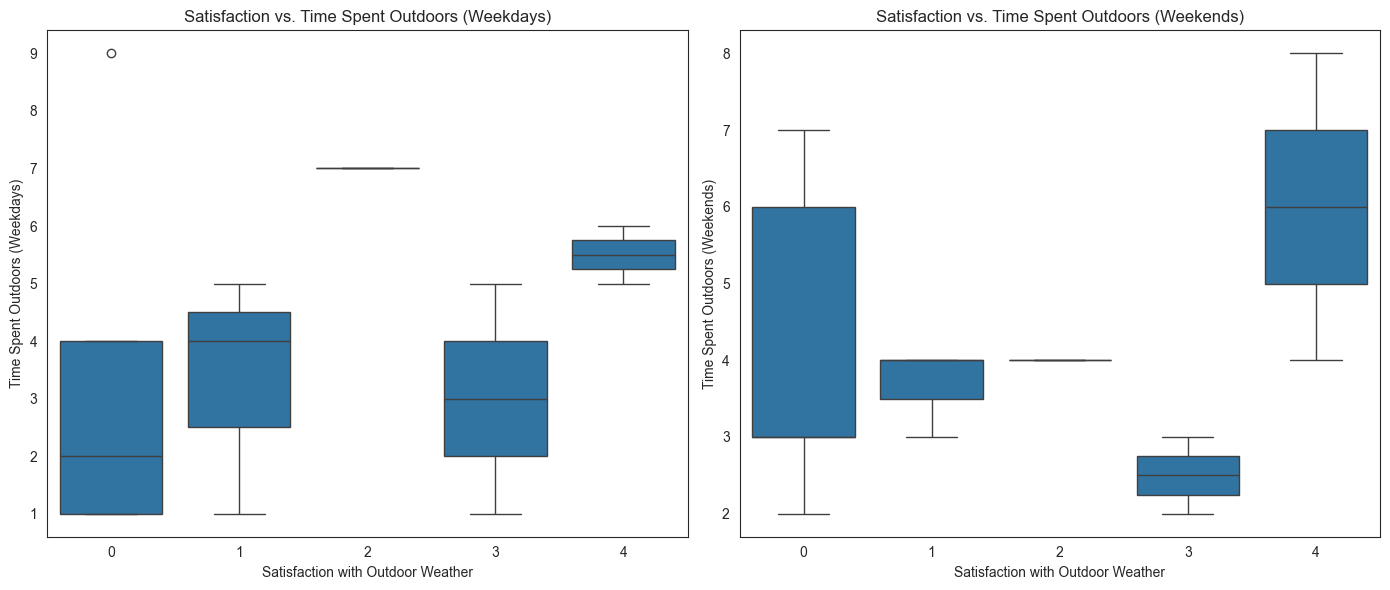

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='StatisfiedOutdoors?', y='TimeSpentOutdoorsWeekday?', data=df)
plt.title('Satisfaction vs. Time Spent Outdoors (Weekdays)')
plt.xlabel('Satisfaction with Outdoor Weather')
plt.ylabel('Time Spent Outdoors (Weekdays)')

plt.subplot(1, 2, 2)
sns.boxplot(x='StatisfiedOutdoors?', y='TimeSpendOutdoorsWeekend?', data=df)
plt.title('Satisfaction vs. Time Spent Outdoors (Weekends)')
plt.xlabel('Satisfaction with Outdoor Weather')
plt.ylabel('Time Spent Outdoors (Weekends)')

plt.tight_layout()

filepath = os.path.join(filepath_dir, "Boxplot_TimeSpentOutdoorsAndStatisfaction.png")
if filepath != "":
    directory = os.path.dirname(filepath)
        
    # Create directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {filepath}")


plt.savefig(filepath)


plt.show()

### Fitness and Exercise?

In [8]:
### Fitness and Exercise outdoors?

# Do you exercise on a usual basis?
# On which of those days do you train outdoors? - Monday
# On which of those days do you train outdoors? - Tuesday
# On which of those days do you train outdoors? - Wednesday
# On which of those days do you train outdoors? - Thursday
# On which of those days do you train outdoors? - Friday
# On which of those days do you train outdoors? - Saturday
# On which of those days do you train outdoors? - Sunday

### Participation Time and Menstruation

In [9]:
### Participant Time & for females additionally mensturation

# If female: When did you had your last period? (State as date dd.MM)
# If female: How long does your period last on average? (in days)
# If female: Please rate the intensity of your menstrual period on a scale from 1 to 10, where 1 is very light, and 10 is extremely intense. - Click to write Choice 1

df = PARTICIPANTS_data_df.copy()

Plot saved to C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\report\_02-ParticipantsData\Histo_StudyTimeParticipation.png


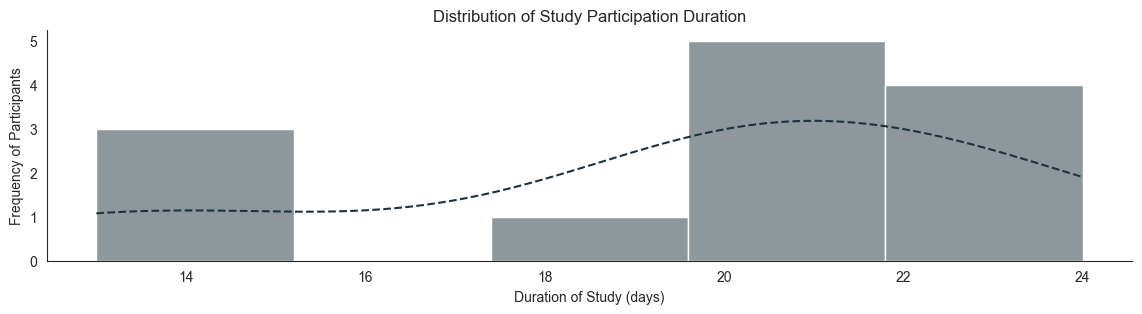

In [173]:
df['Duration'] = (pd.to_datetime(df['End']) - pd.to_datetime(df['Start'])).dt.days

# Plot distribution of study duration
plt.figure(figsize=(14, 3))
sns.histplot(df['Duration'], kde=True, color=color_elderberryblack, line_kws={'linestyle': '--', 'color': 'black'})
plt.title('Distribution of Study Participation Duration')
plt.xlabel('Duration of Study (days)')
plt.ylabel('Frequency of Participants')
sns.despine()

filepath = os.path.join(filepath_dir, "Histo_StudyTimeParticipation.png")
if filepath != "":
    directory = os.path.dirname(filepath)
    
    # Create directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {filepath}")

plt.savefig(filepath)

plt.show()


Plot saved to filepath_dir\Graph_ParticipationTimeAndMensturationCycle.png


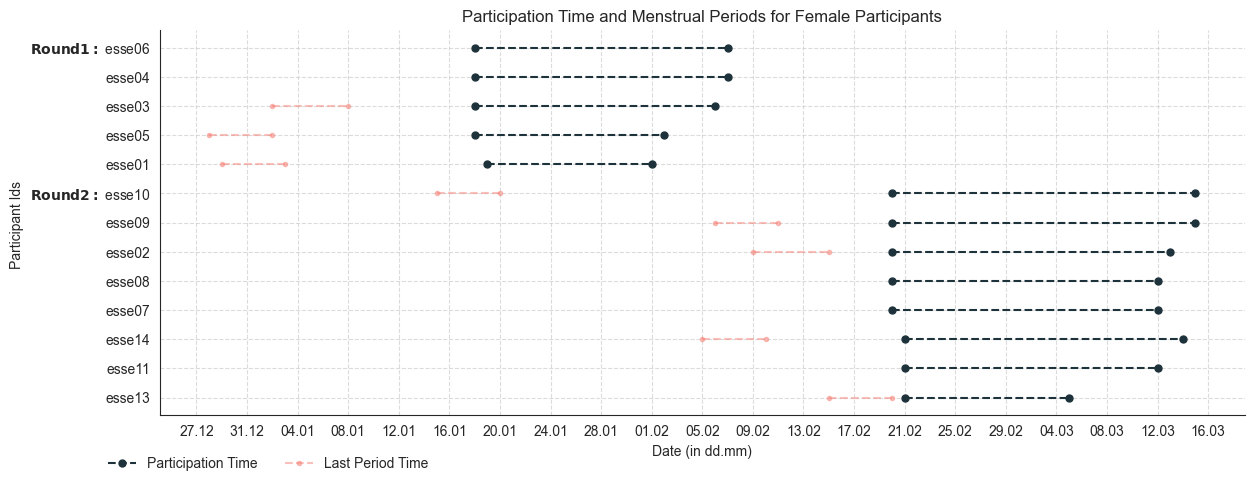

In [179]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df = df.sort_values(by='Start', ascending=False).reset_index(drop=True)

plt.figure(figsize=(14, 5))


# Initialize legend handles and labels
handles = []
labels = []

# Iterate over each participant to plot their participation time
for i, participant in enumerate(df['id_participant']):
    start = df['Start'].iloc[i]
    end = df['End'].iloc[i]
    
    # Plot the start and end points for participation time
    participation_line, = plt.plot([start, end], [participant, participant], 'o--', color=color_elderberryblack, markersize=5)
    if 'Participation Time' not in labels:  # Add legend only once
        handles.append(participation_line)
        labels.append('Participation Time')

    # If the participant is female, add additional points for the last period and its duration
    if df['gender'].iloc[i] == 1:
        last_period = df['LastPeriod?'].iloc[i]
        if pd.notna(last_period) and pd.notna(df['DurationPeriod?'].iloc[i]):
            period_end = last_period + pd.Timedelta(days=int(df['DurationPeriod?'].iloc[i]))
            last_period_line, = plt.plot([last_period, period_end], [participant, participant], 'o--', color=color_coralpink, markersize=3, alpha=0.5)
            if 'Last Period Time' not in labels:  # Add legend only once
                handles.append(last_period_line)
                labels.append('Last Period Time')

# Customize the plot
plt.xlabel('Date (in dd.mm)')
plt.ylabel('Participant Ids ')
plt.title('Participation Time and Menstrual Periods for Female Participants')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the x-axis major locator to month intervals and minor locator to day intervals
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))

plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.1, -0.075), ncol=2, frameon=False)


# Customizing y-axis labels
y_labels = ['esse13', 'esse11', 'esse14', 'esse07', 'esse08', 'esse02', 'esse09', r'$\bf{Round 2:}$ esse10',
            'esse01', 'esse05', 'esse03', 'esse04', r'$\bf{Round 1:}$ esse06']
plt.gca().set_yticks(df['id_participant'])
plt.gca().set_yticklabels(y_labels) 

sns.despine()

filepath = os.path.join("filepath_dir", "Graph_ParticipationTimeAndMensturationCycle.png")
if filepath != "":
    directory = os.path.dirname(filepath)
        
    # Create directory if it doesn't exist
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    plt.savefig(filepath, bbox_inches='tight', pad_inches=0.1)
    print(f"Plot saved to {filepath}")

plt.show()
